This dataset was retrieved from the Kaggle website. The name of the dataset is 'Real Estate Sales 2001-2020', and consist of real estate listings and sales from 2001-2021 in the state of Connecticut. The dataset has information on the list year, date recorded, town, address, assessed value, sale amount, sales ratio, property type, residential type, and years until sold. I will use this dataset for analysis and possibly for machine learning prediction modeling. The questions I intend on answering during analysis are:

What is the average assessed value of properties from year to year?

What is the average sale amount of properties from year to year?

What is the average sales ratio of properties from year to year?

On average, how long did it take the different property types to get sold?

On average, how long did it take the different residential types to get sold?

Which towns saw the most property sales in 2021?

First thing I will do is import the neccessary libraries and set the proper settings desired for analysis.

###### Numpy: For statistical computation
###### Pandas: For data retrieval and data manipulation
###### Matplotlib: For data visuals
###### Seaborn: For enhanced data visuals
###### Plotly: For interactive visuals

In [1]:
import numpy as np 
import pandas as pd
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt 
from matplotlib import style 
%matplotlib inline 
import seaborn as sns
import plotly.express as px 
sns.set_style("darkgrid")
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["figure.facecolor"] = "#00000000"

I will now load the data to be analyzed into a pandas data frame and view the first 5 rows of the data.

In [2]:
Real_Estate_Sales = pd.read_csv(r"C:\Users\Jason\OneDrive\Real_Estate_Sales_2001-2020_GL.csv")
Real_Estate_Sales.head(5)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
0,2020348,2020,9/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.4630,Commercial,Nan,1
1,20002,2020,10/2/2020,Ashford,390 TURNPIKE RD,253000,430000.0,0.5883,Residential,Single Family,0
2,200212,2020,3/9/2021,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.7248,Residential,Condo,1
3,200243,2020,4/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.6958,Residential,Single Family,1
4,200377,2020,7/2/2021,Avon,70 FAR HILLS DRIVE,862330,1447500.0,0.5957,Residential,Single Family,1


I will now take a look at the last 5 rows of data to make sure the data is consistent.

In [3]:
Real_Estate_Sales.tail(5)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
997208,190272,2019,6/24/2020,New London,4 BISHOP CT,60410,53100.0,1.137665,Single Family,Single Family,1
997209,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280,76000.0,0.898400,Single Family,Single Family,0
997210,190129,2019,4/27/2020,Windsor Locks,19 HATHAWAY ST,121450,210000.0,0.578300,Single Family,Single Family,1
997211,190504,2019,6/3/2020,Middletown,8 BYSTREK DR,203360,280000.0,0.726300,Single Family,Single Family,1
997212,190344,2019,12/20/2019,Milford,250 RESEARCH DR,4035970,7450000.0,0.541700,Nan,Nan,0


Lets see how many rows and columns are in this dataset.

In [4]:
Real_Estate_Sales.shape
print(f"There are {Real_Estate_Sales.shape[0]} rows and {Real_Estate_Sales.shape[1]} columns in this dataset.")

There are 997213 rows and 11 columns in this dataset.


Lets now check the dataset for duplicate rows of data.

In [5]:
duplicated = Real_Estate_Sales.duplicated().sum()
print(f"There are {duplicated} rows of duplicated data in this dataset.")

There are 0 rows of duplicated data in this dataset.


Now lets take a look at the unique values in each column.

In [6]:
for col in Real_Estate_Sales.columns:
    unique_values = Real_Estate_Sales[col].nunique()
    print(f"The column {col} has {unique_values} unique values.") 

The column Serial Number has 83537 unique values.
The column List Year has 20 unique values.


The column Date Recorded has 6387 unique values.
The column Town has 170 unique values.
The column Address has 714372 unique values.
The column Assessed Value has 91378 unique values.
The column Sale Amount has 57372 unique values.
The column Sales Ratio has 547044 unique values.
The column Property Type has 12 unique values.
The column Residential Type has 6 unique values.
The column Years until sold has 15 unique values.


Lets take a look at how many null values this dataset has.

In [7]:
for na in Real_Estate_Sales.columns:
    na_values = Real_Estate_Sales[na].isna().sum()
    print(f"The column {na} has {na_values} null values.") 

The column Serial Number has 0 null values.
The column List Year has 0 null values.


The column Date Recorded has 0 null values.
The column Town has 0 null values.
The column Address has 0 null values.
The column Assessed Value has 0 null values.
The column Sale Amount has 0 null values.
The column Sales Ratio has 0 null values.
The column Property Type has 0 null values.
The column Residential Type has 0 null values.
The column Years until sold has 0 null values.


Now I will look at the datatypes for each column, to ensure they are in the correct format.

In [8]:
Real_Estate_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997213 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997213 non-null  object 
 5   Assessed Value    997213 non-null  int64  
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     997213 non-null  object 
 9   Residential Type  997213 non-null  object 
 10  Years until sold  997213 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 83.7+ MB


I notice that there are a few columns that appear to not have the correct datatype associated with them such as 'List Year' and 'Date Recorded'. I will correct those datatypes with the correct format, add a 'Day Recorded', 'Month Recorded' and 'Year Recorded' column and change the datatypes for 'Assessed Value'.

In [9]:
Real_Estate_Sales["Date Recorded"] = pd.to_datetime(Real_Estate_Sales["Date Recorded"])
Real_Estate_Sales["Year Recorded"] = Real_Estate_Sales["Date Recorded"].dt.year
Real_Estate_Sales["Month Recorded"] = Real_Estate_Sales["Date Recorded"].dt.month_name()
Real_Estate_Sales["Day Recorded"] = Real_Estate_Sales["Date Recorded"].dt.day_name()
Real_Estate_Sales["Assessed Value"].astype(float)


0          150500.0
1          253000.0
2          130400.0
3          619290.0
4          862330.0
            ...    
997208      60410.0
997209      68280.0
997210     121450.0
997211     203360.0
997212    4035970.0
Name: Assessed Value, Length: 997213, dtype: float64

Lets check to verify that all datatypes and new columns have been updated.

In [10]:
Real_Estate_Sales.info()
Real_Estate_Sales.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Serial Number     997213 non-null  int64         
 1   List Year         997213 non-null  int64         
 2   Date Recorded     997213 non-null  datetime64[ns]
 3   Town              997213 non-null  object        
 4   Address           997213 non-null  object        
 5   Assessed Value    997213 non-null  int64         
 6   Sale Amount       997213 non-null  float64       
 7   Sales Ratio       997213 non-null  float64       
 8   Property Type     997213 non-null  object        
 9   Residential Type  997213 non-null  object        
 10  Years until sold  997213 non-null  int64         
 11  Year Recorded     997213 non-null  int64         
 12  Month Recorded    997213 non-null  object        
 13  Day Recorded      997213 non-null  object        
dtypes: d

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Year Recorded,Month Recorded,Day Recorded
0,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500,325000.0,0.4630,Commercial,Nan,1,2021,September,Monday
1,20002,2020,2020-10-02,Ashford,390 TURNPIKE RD,253000,430000.0,0.5883,Residential,Single Family,0,2020,October,Friday
2,200212,2020,2021-03-09,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.7248,Residential,Condo,1,2021,March,Tuesday


Now I will examine the statistical columns.

In [11]:
Real_Estate_Sales.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio,Years until sold,Year Recorded
count,9.972130e+05,997213.000000,9.972130e+05,9.972130e+05,9.972130e+05,997213.000000,997213.000000
mean,4.311864e+05,2010.189829,2.791437e+05,3.911512e+05,1.044637e+01,0.750900,2010.940729
std,6.549219e+06,6.237877,1.670610e+06,5.347270e+06,1.890192e+03,0.434742,6.247524
min,0.000000e+00,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00,-18.000000,1999.000000
25%,3.044400e+04,2004.000000,8.760000e+04,1.400000e+05,4.867000e-01,1.000000,2005.000000
50%,7.030300e+04,2010.000000,1.383900e+05,2.250000e+05,6.246000e-01,1.000000,2011.000000
75%,1.518780e+05,2016.000000,2.255600e+05,3.650000e+05,7.852761e-01,1.000000,2017.000000
max,2.000500e+09,2020.000000,8.815100e+08,5.000000e+09,1.226420e+06,4.000000,2021.000000


After looking at the statistical data, I notice that the minimum value for 'Years until sold' is -18. At first glance, this seems a bit strange so I will investigate a bit further.

In [12]:
Real_Estate_Sales[Real_Estate_Sales["Years until sold"] == -18.000000]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Year Recorded,Month Recorded,Day Recorded
857911,170177,2017,1999-04-05,New London,184 PEQUOT AVE 309,46690,95000.0,0.4914,Condo,Condo,-18,1999,April,Monday


Upon investigation, it appears that there has been a typo of some sort in the entry of that row. Because I don't know what the true value is, I will explore a few options that I have to deal with that row. I could assume that the 'Date Recorded' value should be 2019, or I could drop that row from the dataset all together. In this case, I will drop this row from the data frame all together and then recheck the statistical data.

In [13]:
Real_Estate_Sales.describe()


,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio,Years until sold,Year Recorded
count,9.972130e+05,997213.000000,9.972130e+05,9.972130e+05,9.972130e+05,997213.000000,997213.000000
mean,4.311864e+05,2010.189829,2.791437e+05,3.911512e+05,1.044637e+01,0.750900,2010.940729
std,6.549219e+06,6.237877,1.670610e+06,5.347270e+06,1.890192e+03,0.434742,6.247524
min,0.000000e+00,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00,-18.000000,1999.000000
25%,3.044400e+04,2004.000000,8.760000e+04,1.400000e+05,4.867000e-01,1.000000,2005.000000
50%,7.030300e+04,2010.000000,1.383900e+05,2.250000e+05,6.246000e-01,1.000000,2011.000000
75%,1.518780e+05,2016.000000,2.255600e+05,3.650000e+05,7.852761e-01,1.000000,2017.000000
max,2.000500e+09,2020.000000,8.815100e+08,5.000000e+09,1.226420e+06,4.000000,2021.000000


Hmmm... So I'm noticing that there is another negative value in the 'Years until sold' column. I will investigate this further and remove all rows with a negative value in that column.

In [14]:
Real_Estate_Sales[Real_Estate_Sales["Years until sold"] < 0]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Year Recorded,Month Recorded,Day Recorded
388498,60032,2006,2004-02-26,Sharon,DOUGLAS RD,3600,5020.0,0.717131,Nan,Nan,-2,2004,February,Thursday
389700,60626,2006,2001-09-04,Newington,110 MOYLAN CT,64750,88000.0,0.735795,Condo,Condo,-5,2001,September,Tuesday
407732,60508,2006,2003-07-17,Naugatuck,80 GORMAN ST,84200,158900.0,0.529893,Single Family,Single Family,-3,2003,July,Thursday
409330,660578,2006,2005-09-20,Branford,49 ROSE ST TOWERS UT 403,92900,150000.0,0.619333,Condo,Condo,-1,2005,September,Tuesday
410449,60643,2006,2001-09-25,Naugatuck,217 OSBORN RD,183850,293711.0,0.625955,Single Family,Single Family,-5,2001,September,Tuesday
414000,60798,2006,2004-06-05,Bristol,225 TYLER WAY,147320,329900.0,0.446560,Single Family,Single Family,-2,2004,June,Saturday
419243,60550,2006,2004-07-31,Newington,131 STAGE COACH LN,246120,420000.0,0.586000,Single Family,Single Family,-2,2004,July,Saturday
420097,60072,2006,2001-10-27,Greenwich,1010 NORTH ST,573930,660000.0,0.869591,Single Family,Single Family,-5,2001,October,Saturday
424369,69062,2006,2004-09-24,South Windsor,2606 MILL POND DR,123520,243900.0,0.506437,Condo,Condo,-2,2004,September,Friday
426538,60584,2006,2005-08-16,Newington,155 MOYLAN CT,70490,127000.0,0.555039,Condo,Condo,-1,2005,August,Tuesday


There appears to be quite a few rows of data that has the error of a property being sold before the property was up for sale. I will remove the rest of the rows with this error from the dataset.

In [15]:
Real_Estate_Sales = Real_Estate_Sales.drop(Real_Estate_Sales[Real_Estate_Sales["Years until sold"] < 0].index)

Lets recheck the data.

In [16]:
Real_Estate_Sales.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio,Years until sold,Year Recorded
count,9.971570e+05,997157.000000,9.971570e+05,9.971570e+05,9.971570e+05,997157.000000,997157.000000
mean,4.312017e+05,2010.189634,2.791470e+05,3.911539e+05,1.044691e+01,0.751162,2010.940796
std,6.549403e+06,6.237887,1.670655e+06,5.347419e+06,1.890245e+03,0.432394,6.247556
min,0.000000e+00,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2001.000000
25%,3.044400e+04,2004.000000,8.760000e+04,1.400000e+05,4.867000e-01,1.000000,2005.000000
50%,7.030300e+04,2010.000000,1.383900e+05,2.250000e+05,6.246000e-01,1.000000,2011.000000
75%,1.518600e+05,2016.000000,2.255600e+05,3.650000e+05,7.852817e-01,1.000000,2017.000000
max,2.000500e+09,2020.000000,8.815100e+08,5.000000e+09,1.226420e+06,4.000000,2021.000000


Ok, that looks better. I will now check the categorical values of the data.

In [17]:
Real_Estate_Sales.describe(include="object") 

,Town,Address,Property Type,Residential Type,Month Recorded,Day Recorded
count,997157,997157,997157,997157,997157,997157
unique,170,714340,12,6,12,7
top,Bridgeport,MULTI ADDRESSES,Single Family,Single Family,June,Monday
freq,34198,620,401580,444984,103455,230513


Now lets answer some questions:

Question 1 - What is the average assessed value of properties from year to year?

In [18]:
avg_assessed_value_by_year = Real_Estate_Sales.groupby("List Year")["Assessed Value"].mean()
avg_assessed_value_by_year
print(f"""The average assessed value of properties from year to year is:

{avg_assessed_value_by_year}

The year 2011 saw the highest average assessed value with $412,067.63 on average.""") 

The average assessed value of properties from year to year is:

List Year
2001    138961.045482
2002    177434.080594
2003    188067.638755
2004    214266.720175
2005    198067.146424
2006    338304.922597
2007    334538.783715
2008    292110.829388
2009    338422.314482
2010    307099.145621
2011    412067.636279
2012    356469.492341
2013    336146.203891
2014    307782.171116
2015    300223.060792
2016    323196.232958
2017    331779.726359
2018    300361.141276
2019    309314.686637
2020    323368.449258
Name: Assessed Value, dtype: float64

The year 2011 saw the highest average assessed value with $412,067.63 on average.


Scatterplot to visualize the avg assessed value by list year.


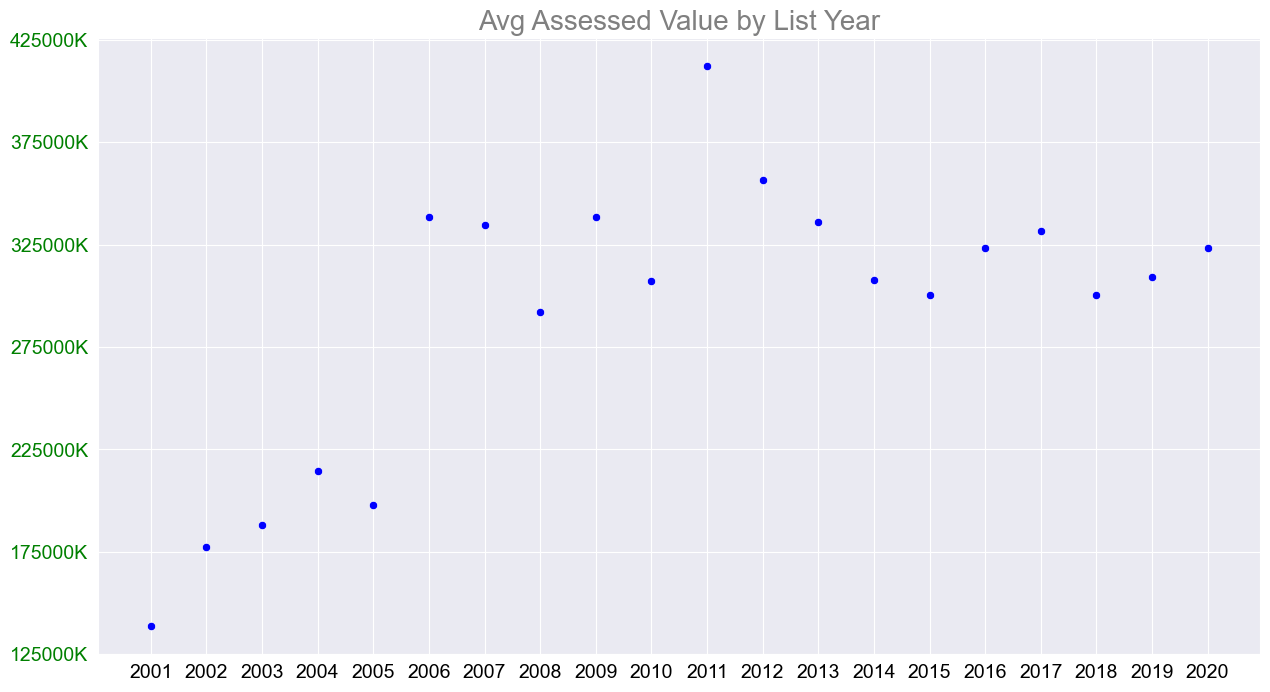

In [19]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=avg_assessed_value_by_year,
                color="blue")
plt.title("Avg Assessed Value by List Year", 
          fontsize=20,
          color="grey") 
plt.ylabel("") 
val = list(range(125000, 450000, 50000))
plt.yticks(val, [f"{v}K" for v in val],
           color="green")
years = list(range(2001, 2021, 1))
plt.xticks(years, [f"{y}" for y in years],
           color="black")
plt.xlabel("")  
print("Scatterplot to visualize the avg assessed value by list year.")

Line graph visualizing avg assessed value by list year.


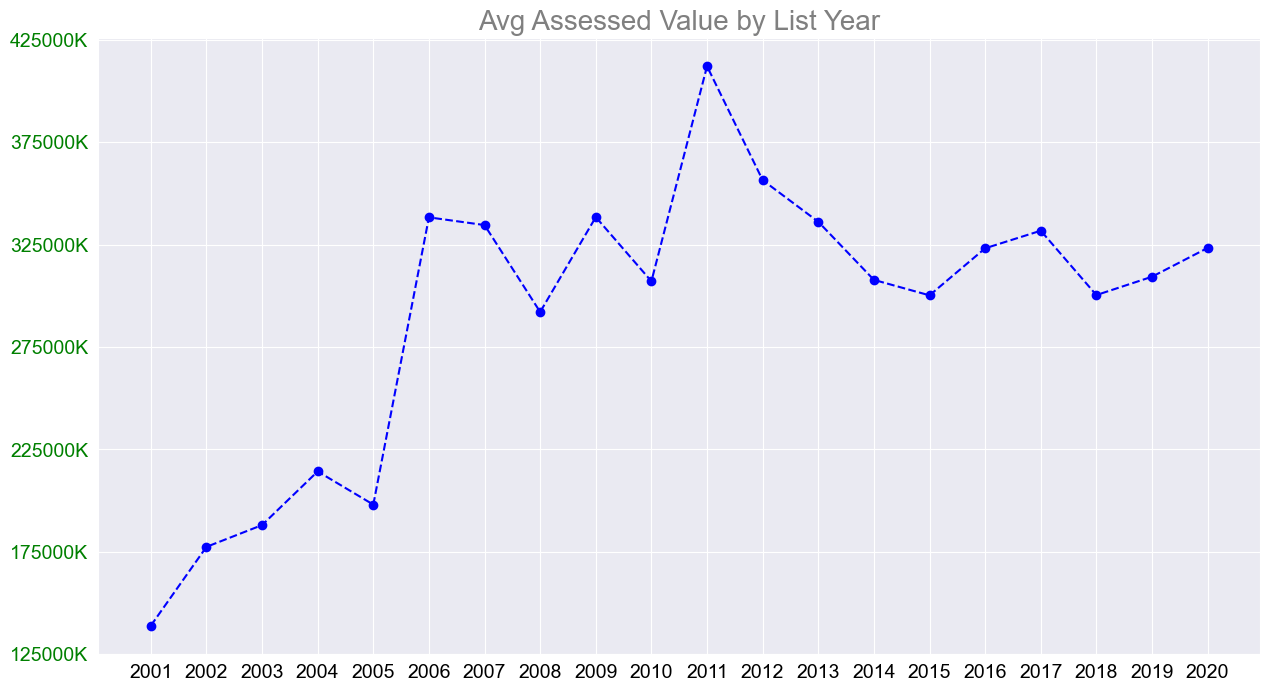

In [20]:
plt.figure(figsize=(15,8))
avg_assessed_value_by_year.plot(linestyle="--",
                             marker="o",
                             label="line with marker",
                             color="blue")
plt.title("Avg Assessed Value by List Year",
          fontsize=20,
          color="grey") 
val = list(range(125000, 450000, 50000))
plt.yticks(val, [f"{v}K" for v in val],
           color="green") 
year = list(range(2001,2021,1))
plt.xticks(year, [f"{y}" for y in year],
           color="black") 
plt.xlabel("")
print("Line graph visualizing avg assessed value by list year.")

Bar graph to visualize the avg assessed value by list year.


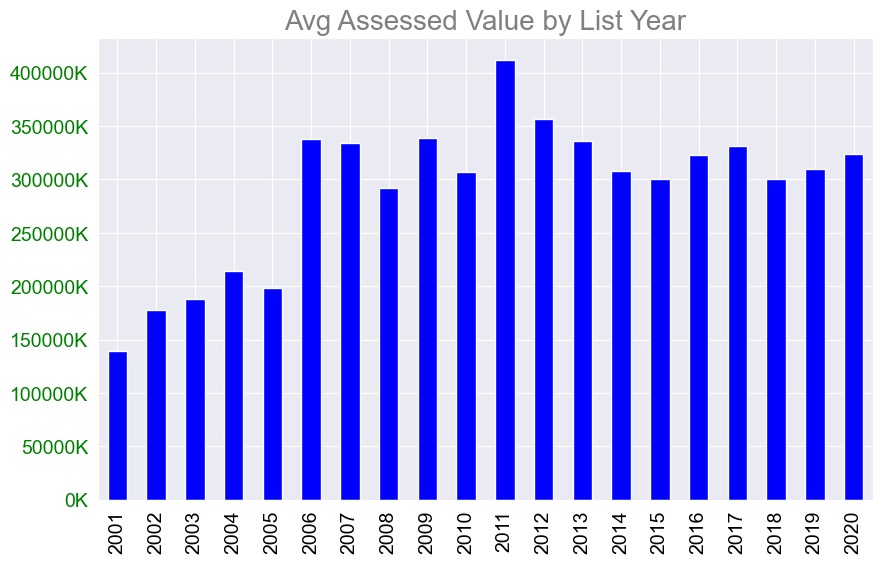

In [21]:
avg_assessed_value_by_year.plot(kind="bar",
                                color="blue")
plt.title("Avg Assessed Value by List Year",
          color="grey",
          fontsize=20)
value = list(range(0,450000,50000))
plt.yticks(value, [f"{v}K" for v in value],
           color="green")
plt.xlabel("") 
plt.xticks(color="black") 
print("Bar graph to visualize the avg assessed value by list year.")

Question 2 - What is the average sale amount of properties from year to year?

In [22]:
avg_sale_amount_by_year = Real_Estate_Sales.groupby("List Year")["Sale Amount"].mean()
avg_sale_amount_by_year
print(f"""The average sale amount of properties from year to year is:
      
{avg_sale_amount_by_year}
      
The year 2020 saw the highest average sale amount of $604,963.87.""")

The average sale amount of properties from year to year is:
      
List Year
2001    246235.035160
2002    296357.123706
2003    327217.932922
2004    380297.014169
2005    364030.126084
2006    475445.789084
2007    435696.741429
2008    325831.792393
2009    355250.327162
2010    331657.472575
2011    391684.320747
2012    395458.156724
2013    413516.239641
2014    401421.941220
2015    345883.763949
2016    507761.249272
2017    393267.499664
2018    383754.432531
2019    420296.971308
2020    604963.871051
Name: Sale Amount, dtype: float64
      
The year 2020 saw the highest average sale amount of $604,963.87.


Scatterplot to visualize the avg sales amount by list year.


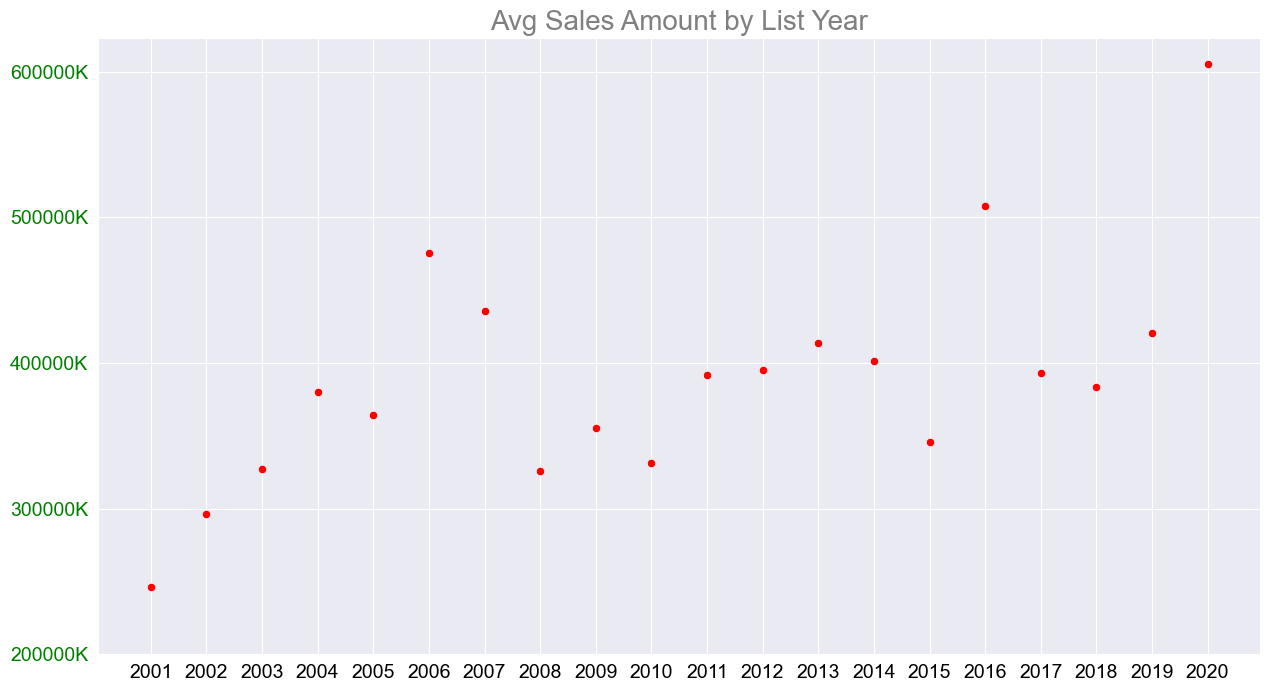

In [23]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=avg_sale_amount_by_year,
                color="red") 
plt.title("Avg Sales Amount by List Year",
          fontsize=20,
          color="grey") 
values = list(range(200000, 610000, 100000))
plt.yticks(values, [f"{v}K" for v in values],
           color="green")
plt.ylabel("") 
years = list(range(2001, 2021, 1))
plt.xticks(years, [f"{y}" for y in years],
           color="black")
plt.xlabel("") 
print("Scatterplot to visualize the avg sales amount by list year.")

Line graph visualizing avg sales amount by list year.


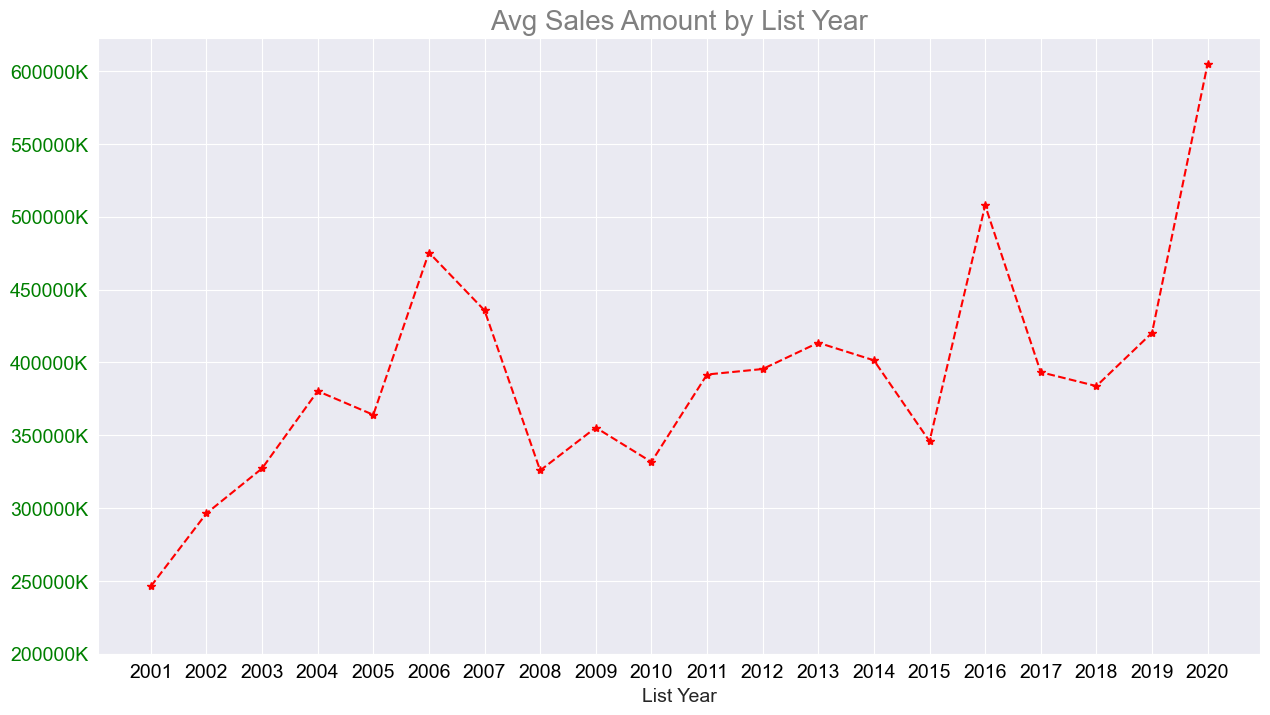

In [24]:
plt.figure(figsize=(15,8))
avg_sale_amount_by_year.plot(linestyle="--",
                             marker="*",
                             label="line with marker",
                             color="red")
plt.title("Avg Sales Amount by List Year",
          fontsize=20,
          color="grey") 
val = list(range(200000, 610000, 50000))
plt.yticks(val, [f"{v}K" for v in val],
           color="green") 
year = list(range(2001,2021,1))
plt.xticks(year, [f"{y}" for y in year],
           color="black") 
print("Line graph visualizing avg sales amount by list year.")

Bar graph to visualize the avg sale amount by list year.


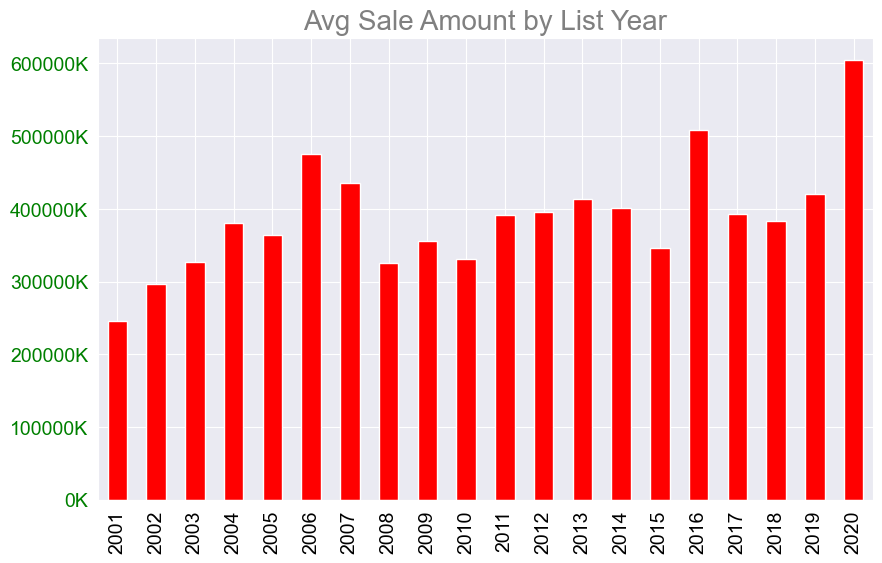

In [25]:
avg_sale_amount_by_year.plot(kind="bar",
color="red")
plt.title("Avg Sale Amount by List Year",
          color="grey",
          fontsize=20)
value = list(range(0,650000,100000))
plt.yticks(value, [f"{v}K" for v in value],
           color="green")
plt.xlabel("") 
plt.xticks(color="black") 
print("Bar graph to visualize the avg sale amount by list year.")

Scatterplot visualization of avg assessed value vs. avg sale amount.


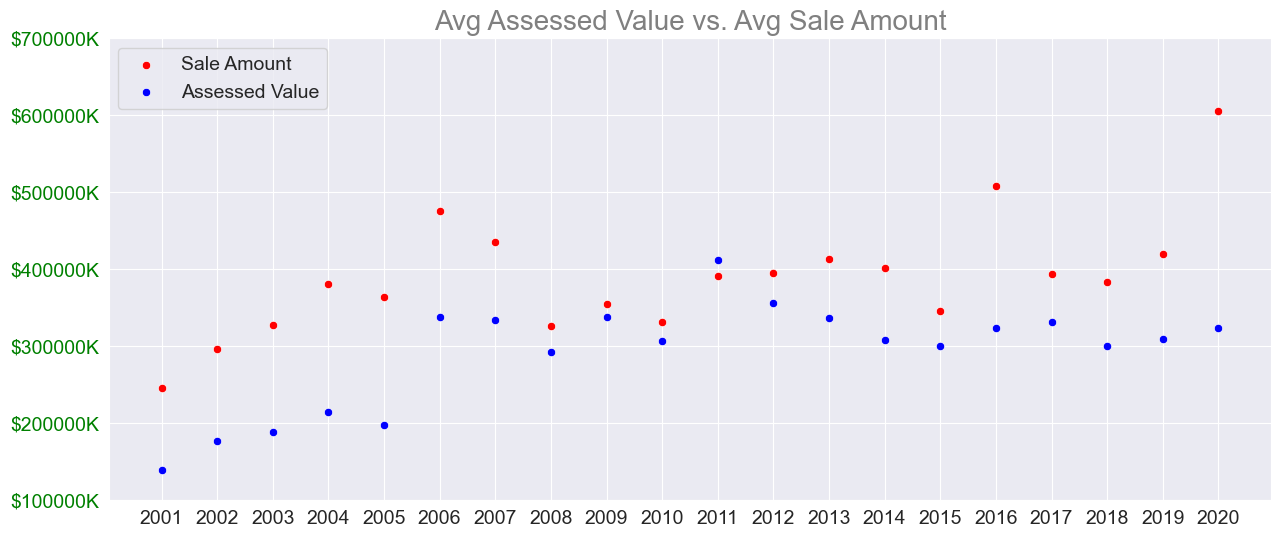

In [26]:
plt.figure(figsize=(15,6))
l = ["Sale Amount", "Assessed Value"]
sns.scatterplot(data=avg_sale_amount_by_year, color="red")
sns.scatterplot(data=avg_assessed_value_by_year, color="blue")
plt.title("Avg Assessed Value vs. Avg Sale Amount", color="grey", fontsize=20) 
plt.legend(l, loc=2)
years = list(range(2001,2021,1))
plt.xticks(years, [f"{y}" for y in years])
plt.xlabel("") 
sales = list(range(100000, 800000, 100000))
plt.yticks(sales, [f"${s}K" for s in sales], color="green")
plt.ylabel("") 
print("Scatterplot visualization of avg assessed value vs. avg sale amount.")

Line graph visualization of avg assessed value vs. avg sale amount.


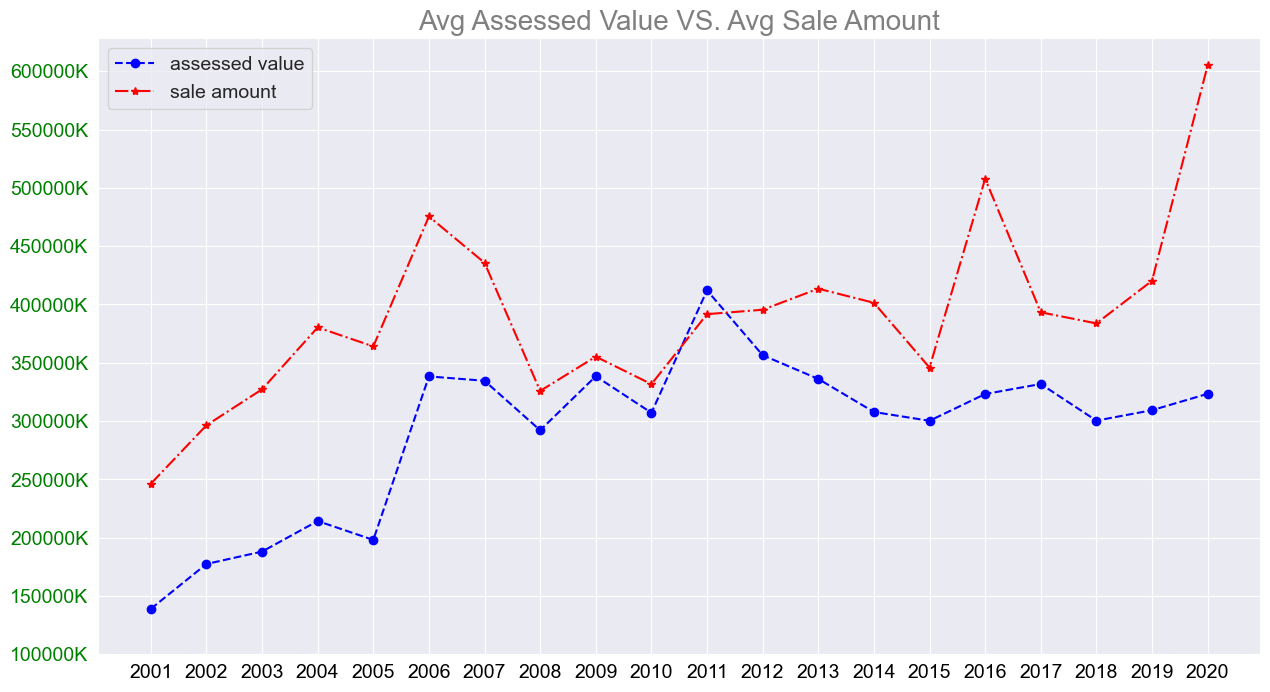

In [27]:
l = ["assessed value", "sale amount"]
plt.figure(figsize=(15,8))
avg_assessed_value_by_year.plot(linestyle="--",
                                marker="o",
                                label="line with marker",
                                color="blue") 
avg_sale_amount_by_year.plot(linestyle="-.",
                             marker="*",
                             label="line with marker",
                             color="red") 
plt.title("Avg Assessed Value VS. Avg Sale Amount",
          fontsize=20,
          color="grey") 
plt.legend(l)
values = list(range(100000,650000,50000))
plt.yticks(values, [f"{v}K" for v in values], 
           color="green") 
years = list(range(2001,2021,1)) 
plt.xticks(years, [f"{y}" for y in years],
           color="black")
plt.xlabel("") 
print("Line graph visualization of avg assessed value vs. avg sale amount.")

Question 3 - What is the average sales ratio of properties from year to year?

In [28]:
avg_sales_ratio_by_year = Real_Estate_Sales.groupby("List Year")["Sales Ratio"].mean()
avg_sales_ratio_by_year
print(f"""The average sales ratio of properties from year to year is:
      
{avg_sales_ratio_by_year}

The year 2005 had the highest average sales ratio by year being 76.0""")

The average sales ratio of properties from year to year is:
      
List Year
2001     3.506386
2002     4.087334
2003     5.340675
2004     9.222742
2005    76.009086
2006    52.084361
2007     2.113412
2008     1.603672
2009     2.269027
2010     2.435234
2011     2.738944
2012     2.143824
2013     2.415508
2014     1.673331
2015     3.943542
2016     1.786716
2017     2.330480
2018     9.352387
2019     1.140670
2020     0.831716
Name: Sales Ratio, dtype: float64

The year 2005 had the highest average sales ratio by year being 76.0


Line graph of avg sales ratio by year


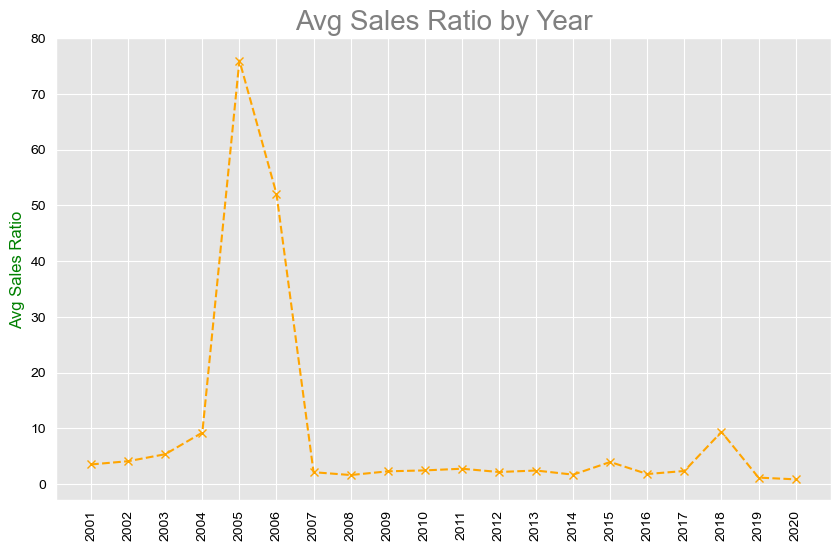

In [41]:
avg_sales_ratio_by_year.plot(linestyle="--",
                             marker="x",
                             label="line with marker",
                             color="orange",
                             rot=90) 
plt.title("Avg Sales Ratio by Year",
          fontsize=20,
          color="grey")
ratio = list(range(0,90,10))
plt.yticks(ratio, [f"{r}" for r in ratio],
       color="black") 
plt.ylabel("Avg Sales Ratio", 
           color="green")
year = list(range(2001,2021,1))
plt.xticks(year, [f"{y}" for y in year],
       color="black")
plt.xlabel("")  
print("Line graph of avg sales ratio by year")

Bar graph of avg sales ratio by year


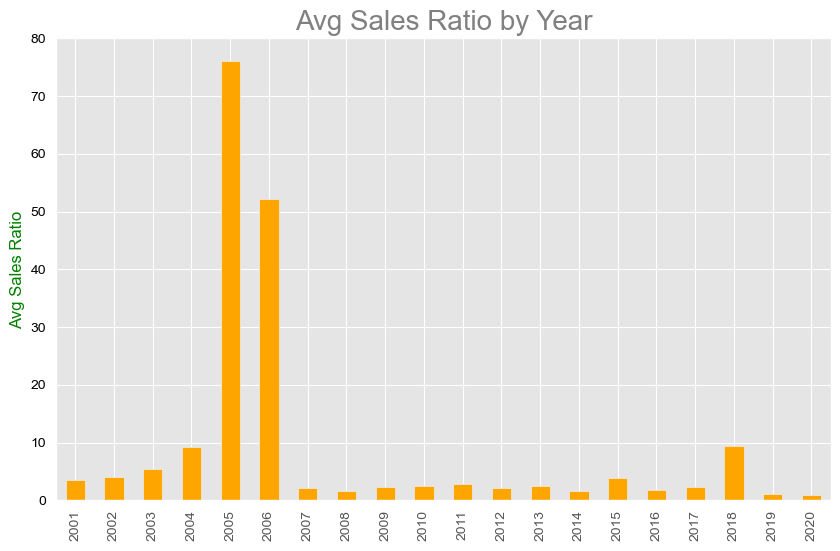

In [42]:
avg_sales_ratio_by_year.plot(kind="bar",
                             color="orange") 
plt.title("Avg Sales Ratio by Year",
          fontsize=20,
          color="grey")
ratio = list(range(0,90,10))
plt.yticks(ratio, [f"{r}" for r in ratio],
       color="black") 
plt.ylabel("Avg Sales Ratio",
           color="green")
plt.xlabel("")  
print("Bar graph of avg sales ratio by year")

On average, how long did it take the different property types to get sold?

In [31]:
avg_time_property_types_sold_by_property = Real_Estate_Sales.groupby("Property Type")["Years until sold"].mean()
avg_time_property_types_sold_by_property
print(f"""The longest property types to sell are Apartments at 0.818930 years, which is longer than 9 months and 
the shortest property types to sell are Residentials, which is under 9 months. """)

The longest property types to sell are Apartments at 0.818930 years, which is longer than 9 months and 
the shortest property types to sell are Residentials, which is under 9 months. 


Bar graph visualization of avg years fro property types to sell.


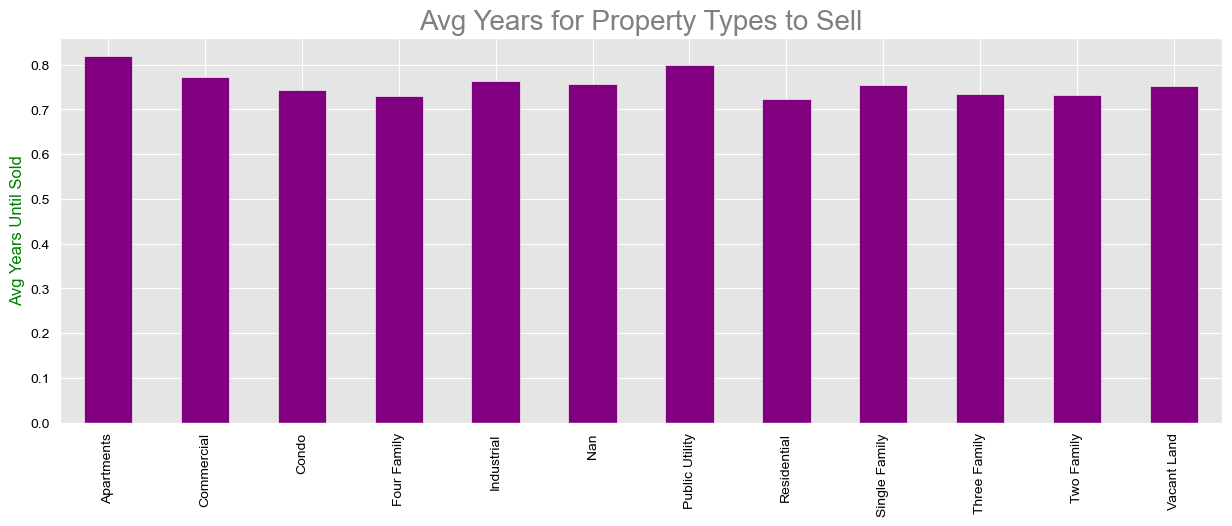

In [43]:
plt.figure(figsize=(15,5))
avg_time_property_types_sold_by_property.plot(kind="bar",
                                              color="purple") 
plt.title("Avg Years for Property Types to Sell",
          fontsize=20,
          color="grey")
plt.xlabel("")
plt.xticks(color="black") 
plt.yticks(color="black")
[plt.ylabel("Avg Years Until Sold",
            color="green")]
print("Bar graph visualization of avg years fro property types to sell.")


On average, how long did it take the different residential types to get sold?

In [33]:
avg_time_residential_type_sold_by_residential = Real_Estate_Sales.groupby("Residential Type")["Years until sold"].mean()
avg_time_residential_type_sold_by_residential

Residential Type
Condo            0.743224
Four Family      0.734491
Nan              0.757123
Single Family    0.749661
Three Family     0.736790
Two Family       0.735299
Name: Years until sold, dtype: float64

Line graph visualization of avg years for residential types to sell.


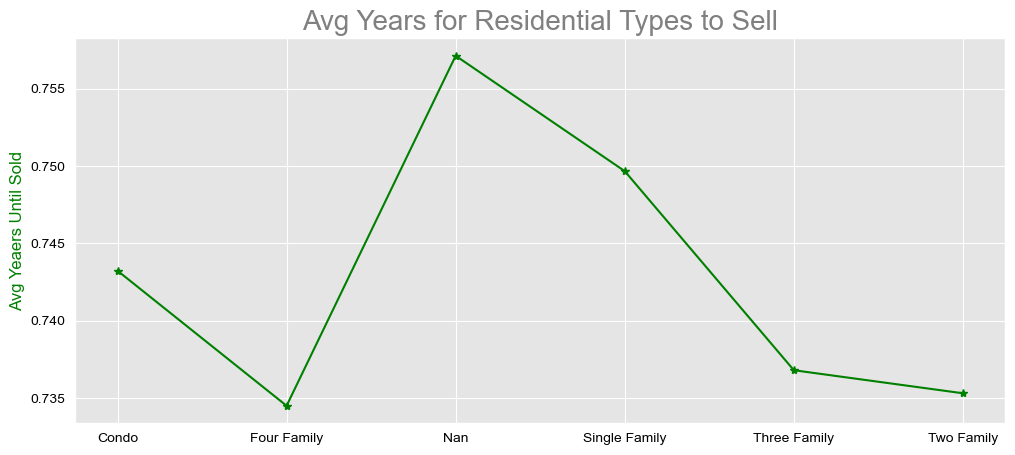

In [44]:
plt.figure(figsize=(12,5))
avg_time_residential_type_sold_by_residential.plot(linestyle="-",
                                                   marker="*",
                                                   label="line with marker",
                                                   color="green") 
plt.title("Avg Years for Residential Types to Sell",
          fontsize=20,
          color="grey") 
plt.xticks(color="black") 
plt.xlabel("") 
plt.yticks(color="black") 
plt.ylabel("Avg Yeaers Until Sold",
           color="green")
print("Line graph visualization of avg years for residential types to sell.")

Which towns saw the most property sales in 2021?

In [35]:
highest_property_sales = Real_Estate_Sales.groupby("Town")["Sale Amount"].max().sort_values(ascending=False)
highest_property_sales = pd.DataFrame(highest_property_sales)
highest_property_sales

,Sale Amount
Town,
Willington,5.000000e+09
Stamford,3.955000e+08
Waterbury,2.300436e+08
Greenwich,1.817000e+08
Manchester,1.612388e+08
...,...
Hampton,9.794490e+05
Scotland,9.750000e+05
Chaplin,8.200000e+05


In [36]:
pd.set_option("display.min_rows", 150)
pd.set_option("display.max_rows", 150)
highest_property_sales_2021 = Real_Estate_Sales[Real_Estate_Sales["Year Recorded"] == 2021].groupby(["Town", "Year Recorded"])["Sale Amount"].max()
highest_property_sales_2021 = pd.DataFrame(highest_property_sales_2021)
highest_property_sales_2021

,,Sale Amount
Town,Year Recorded,
Andover,2021,9.950000e+05
Ansonia,2021,6.850000e+05
Ashford,2021,4.381522e+06
Avon,2021,2.900000e+07
Barkhamsted,2021,6.100000e+05
Beacon Falls,2021,6.012910e+05
Berlin,2021,1.400000e+06
Bethany,2021,1.230000e+06
Bethel,2021,2.520000e+06


Lets visualize the top 5 towns that saw the highest property sales in 2021

In [37]:
top_5_property_sales_2021 = highest_property_sales_2021.sort_values(by="Sale Amount", ascending=False)[:5]
top_5_property_sales_2021

,,Sale Amount
Town,Year Recorded,
Willington,2021,5.000000e+09
Stamford,2021,1.540000e+08
Norwalk,2021,1.030000e+08
Trumbull,2021,8.200000e+07
Greenwich,2021,6.350000e+07


The town of Willington had the highest percentage of property sales in the year 2021.


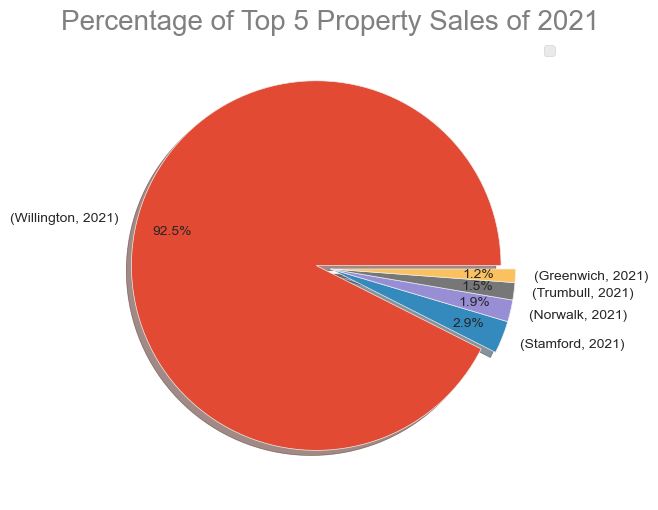

In [51]:
e = [0.08, 0, 0, 0, 0]
top_5_property_sales_2021.plot(kind="pie",
                                y="Sale Amount",
                                autopct="%1.1f%%", 
                                shadow=True, 
                                explode=e, 
                                pctdistance=0.8)
plt.title("Percentage of Top 5 Property Sales of 2021",
          color="grey",
          fontsize=20)
plt.ylabel("") 
plt.xlabel("")
plt.legend("")
style.use("ggplot")
print(f"The town of Willington had the highest percentage of property sales in the year 2021.")